<a href="https://colab.research.google.com/github/Undasnr/DL-ML/blob/main/Ronny_SVM_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SVM**

SVM Scratch

Here is a template for implementing SVM Scratch that I will add some code to the ScratchSVMClassifier class and use it to solve the problems.

Prototype
```python
class ScratchSVMClassifier():
    """
    Scratch implementation of SVM classifier

    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    kernel : str
      Kernel type. Linear kernel (linear) or polynomial kernel (polly)
    threshold : float
      Threshold for choosing a support vector
    verbose : bool
      True to output the learning process

    Attributes
    ----------
    self.n_support_vectors : int
      Number of support vectors
    self.index_support_vectors : The following form of ndarray, shape (n_support_vectors,)
      Support vector index
    self.X_sv :  The following forms of ndarray, shape (n_support_vectors, n_features)
      Support vector features
    self.lam_sv :  The following forms of ndarray, shape (n_support_vectors, 1)
      Support vector undetermined multiplier
    self.y_sv :  The following forms of ndarray, shape (n_support_vectors, 1)
      Support vector label

    """

    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn the SVM classifier. If verification data is input, the accuracy for it is also calculated for each iteration.

        Parameters
        ----------
        X : of the following form. ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : of the following form. ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : The following form of ndarray, shape (n_samples,)
            Correct value of verification data
        """

        if self.verbose:
            Output the learning process when #verbose is set to True
            print()
        pass

    def predict(self, X):
        """
        Estimate the label using the SVM classifier.

        Parameters
        ----------
        X : of the following form. ndarray, shape (n_samples, n_features)
            sample

        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by SVM classifier
        """

        pass
        return
```


**1. Lagrange's steepest descent by the undetermined multiplier method**

In [2]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# SVM Classifier with Lagrange multipliers
class ScratchSVMClassifier:
    def __init__(self, num_iter=1000, lr=0.01, kernel='linear', threshold=1e-5, verbose=False):
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose

        self.lam = None  # Lagrange multipliers
        self.X = None
        self.y = None

    def kernel_function(self, x_i, x_j):
        if self.kernel == 'linear':
            return np.dot(x_i, x_j)
        else:
            raise NotImplementedError("Only linear kernel is implemented.")

    def update_lambda(self, i):
        x_i = self.X[i]
        y_i = self.y[i]
        sum_term = 0

        for j in range(len(self.X)):
            x_j = self.X[j]
            y_j = self.y[j]
            sum_term += self.lam[j] * y_i * y_j * self.kernel_function(x_i, x_j)

        # Steepest descent update
        self.lam[i] += self.lr * (1 - sum_term)

        # Enforce non-negativity
        if self.lam[i] < 0:
            self.lam[i] = 0

    def fit(self, X, y):
        self.X = X
        self.y = y
        n_samples = X.shape[0]
        self.lam = np.zeros(n_samples)

        for it in range(self.iter):
            for i in range(n_samples):
                self.update_lambda(i)

            if self.verbose and it % 100 == 0:
                print(f"Iter {it}: λ sum = {np.sum(self.lam):.4f}")

        # Compute weight vector w and bias b
        self.w = np.sum((self.lam * self.y)[:, None] * self.X, axis=0)
        support_indices = np.where(self.lam > self.threshold)[0]
        self.b = np.mean([self.y[i] - np.dot(self.w, self.X[i]) for i in support_indices])

    def predict(self, X):
        decision = np.dot(X, self.w) + self.b
        return (decision >= 0).astype(int)

# Generate linearly separable data
X, y = make_classification(n_samples=100, n_features=2, n_classes=2,
                           n_informative=2, n_redundant=0, random_state=42)

# Train the model
model = ScratchSVMClassifier(num_iter=1000, lr=0.001, verbose=True)
model.fit(X, y)

# Predict and evaluate
y_pred = model.predict(X)
print("Accuracy:", accuracy_score(y, y_pred))

Iter 0: λ sum = 0.0986
Iter 100: λ sum = 6.6069
Iter 200: λ sum = 12.3567
Iter 300: λ sum = 18.0078
Iter 400: λ sum = 23.5837
Iter 500: λ sum = 29.1720
Iter 600: λ sum = 34.7042
Iter 700: λ sum = 40.2224
Iter 800: λ sum = 45.7059
Iter 900: λ sum = 51.1753
Accuracy: 0.82


**2. Support Vector Determination**

In [4]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# SVM Classifier with Lagrange multipliers and support vector detection
class ScratchSVMClassifier:
    def __init__(self, num_iter=1000, lr=0.01, kernel='linear', threshold=1e-5, verbose=False):
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose

        self.lam = None  # Lagrange multipliers
        self.X = None
        self.y = None

        # Support vector attributes
        self.n_support_vectors = 0
        self.index_support_vectors = None
        self.X_sv = None
        self.y_sv = None
        self.lam_sv = None

    def kernel_function(self, x_i, x_j):
        if self.kernel == 'linear':
            return np.dot(x_i, x_j)
        else:
            raise NotImplementedError("Only linear kernel is implemented.")

    def update_lambda(self, i):
        x_i = self.X[i]
        y_i = self.y[i]
        sum_term = 0

        for j in range(len(self.X)):
            x_j = self.X[j]
            y_j = self.y[j]
            sum_term += self.lam[j] * y_i * y_j * self.kernel_function(x_i, x_j)

        # Steepest descent update
        self.lam[i] += self.lr * (1 - sum_term)

        # Enforce non-negativity
        if self.lam[i] < 0:
            self.lam[i] = 0

    def fit(self, X, y):
        self.X = X
        self.y = y
        n_samples = X.shape[0]
        self.lam = np.zeros(n_samples)

        for it in range(self.iter):
            for i in range(n_samples):
                self.update_lambda(i)

            if self.verbose and it % 100 == 0:
                print(f"Iter {it}: λ sum = {np.sum(self.lam):.4f}")

        # Compute weight vector w
        self.w = np.sum((self.lam * self.y)[:, None] * self.X, axis=0)

        # Identify support vectors
        support_mask = self.lam > self.threshold
        self.index_support_vectors = np.where(support_mask)[0]
        self.X_sv = self.X[support_mask]
        self.y_sv = self.y[support_mask]
        self.lam_sv = self.lam[support_mask].reshape(-1, 1)
        self.n_support_vectors = len(self.index_support_vectors)

        # Estimate bias using support vectors
        self.b = np.mean([self.y[i] - np.dot(self.w, self.X[i]) for i in self.index_support_vectors])

        if self.verbose:
            print(f"Number of support vectors: {self.n_support_vectors}")

    def predict(self, X):
        decision = np.dot(X, self.w) + self.b
        return (decision >= 0).astype(int)

# Generate linearly separable data
X, y = make_classification(n_samples=100, n_features=2, n_classes=2,
                           n_informative=2, n_redundant=0, random_state=42)

# Train the model
model = ScratchSVMClassifier(num_iter=1000, lr=0.001, threshold=1e-5, verbose=True)
model.fit(X, y)

# Predict and evaluate
y_pred = model.predict(X)
print("Accuracy:", accuracy_score(y, y_pred))


Iter 0: λ sum = 0.0986
Iter 100: λ sum = 6.6069
Iter 200: λ sum = 12.3567
Iter 300: λ sum = 18.0078
Iter 400: λ sum = 23.5837
Iter 500: λ sum = 29.1720
Iter 600: λ sum = 34.7042
Iter 700: λ sum = 40.2224
Iter 800: λ sum = 45.7059
Iter 900: λ sum = 51.1753
Number of support vectors: 64
Accuracy: 0.82


**3. Estimation**

At the time of estimation, the Support Vector Machine (SVM) uses the dual form of the decision function to classify new data points. This function relies only on the support vectors, their labels, and the kernel function, which computes similarity between the input and each support vector.

In [5]:
class SVM:
    def __init__(self, kernel='linear', b=0.0):
        self.kernel = kernel
        self.b = b
        self.X_sv = None       # Support vectors
        self.y_sv = None       # Labels of support vectors
        self.lam_sv = None     # Lagrange multipliers

    def kernel_function(self, x1, x2):
        if self.kernel == 'linear':
            return np.dot(x1, x2)
        elif self.kernel == 'polynomial':
            degree = 3
            return (np.dot(x1, x2) + 1) ** degree
        elif self.kernel == 'rbf':
            gamma = 0.1
            return np.exp(-gamma * np.linalg.norm(x1 - x2) ** 2)
        else:
            raise ValueError("Unsupported kernel type")

    def predict(self, X):
        y_pred = []
        for x in X:
            decision = 0
            for i in range(len(self.X_sv)):
                decision += (
                    self.lam_sv[i] *
                    self.y_sv[i] *
                    self.kernel_function(x, self.X_sv[i])
                )
            decision += self.b
            y_pred.append(1 if decision >= 0 else -1)
        return np.array(y_pred)

**4. Learning and Estimation**

In [6]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Step 1: Load and preprocess Iris dataset for binary classification
iris = load_iris()
X = iris.data
y = iris.target

# Convert to binary classification: class 0 vs class 1
binary_mask = y < 2
X = X[binary_mask]
y = y[binary_mask]
y = np.where(y == 0, -1, 1)  # Convert labels to {-1, 1}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Scratch SVM class (prediction only)
class ScratchSVM:
    def __init__(self, kernel='linear', b=0.0):
        self.kernel = kernel
        self.b = b
        self.X_sv = None
        self.y_sv = None
        self.lam_sv = None

    def kernel_function(self, x1, x2):
        if self.kernel == 'linear':
            return np.dot(x1, x2)
        elif self.kernel == 'polynomial':
            degree = 3
            return (np.dot(x1, x2) + 1) ** degree
        elif self.kernel == 'rbf':
            gamma = 0.1
            return np.exp(-gamma * np.linalg.norm(x1 - x2) ** 2)
        else:
            raise ValueError("Unsupported kernel type")

    def predict(self, X):
        y_pred = []
        for x in X:
            decision = 0
            for i in range(len(self.X_sv)):
                decision += (
                    self.lam_sv[i] *
                    self.y_sv[i] *
                    self.kernel_function(x, self.X_sv[i])
                )
            decision += self.b
            y_pred.append(1 if decision >= 0 else -1)
        return np.array(y_pred)

# Step 3: Dummy support vectors (for demonstration)
# Replace with actual training logic later
scratch_model = ScratchSVM(kernel='linear', b=0.0)
scratch_model.X_sv = X_train[:10]
scratch_model.y_sv = y_train[:10]
scratch_model.lam_sv = np.ones(10)  # Dummy lambda values

y_pred_scratch = scratch_model.predict(X_test)

# Step 4: scikit-learn SVM
sk_model = SVC(kernel='linear')
sk_model.fit(X_train, y_train)
y_pred_sklearn = sk_model.predict(X_test)

# Step 5: Evaluation
def evaluate(y_true, y_pred, label):
    print(f"{label} Accuracy:  {accuracy_score(y_true, y_pred):.3f}")
    print(f"{label} Precision: {precision_score(y_true, y_pred):.3f}")
    print(f"{label} Recall:    {recall_score(y_true, y_pred):.3f}")
    print()

evaluate(y_test, y_pred_scratch, "Scratch SVM")
evaluate(y_test, y_pred_sklearn, "scikit-learn SVM")

Scratch SVM Accuracy:  0.400
Scratch SVM Precision: 0.400
Scratch SVM Recall:    1.000

scikit-learn SVM Accuracy:  1.000
scikit-learn SVM Precision: 1.000
scikit-learn SVM Recall:    1.000



**5. Visualization of Decision Area**

Training Scratch SVM...
Iteration 0: Training Accuracy = 0.4750
Iteration 100: Training Accuracy = 0.4750
Iteration 200: Training Accuracy = 0.4750
Iteration 300: Training Accuracy = 0.4750
Iteration 400: Training Accuracy = 0.4750
Iteration 500: Training Accuracy = 0.4750
Iteration 600: Training Accuracy = 0.4750
Iteration 700: Training Accuracy = 0.4750
Iteration 800: Training Accuracy = 0.4750
Iteration 900: Training Accuracy = 0.4750
Training complete. Support vectors found: 15

Scratch SVM Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000


/tmp/ipython-input-1474281482.py:89: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


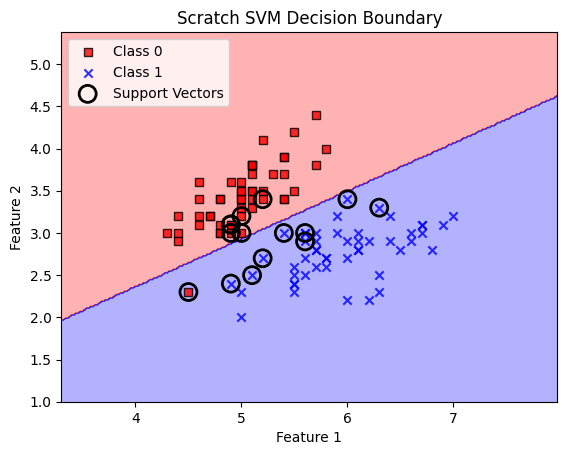

/tmp/ipython-input-1474281482.py:89: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],



Training scikit-learn SVM...

Scikit-learn SVM Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000


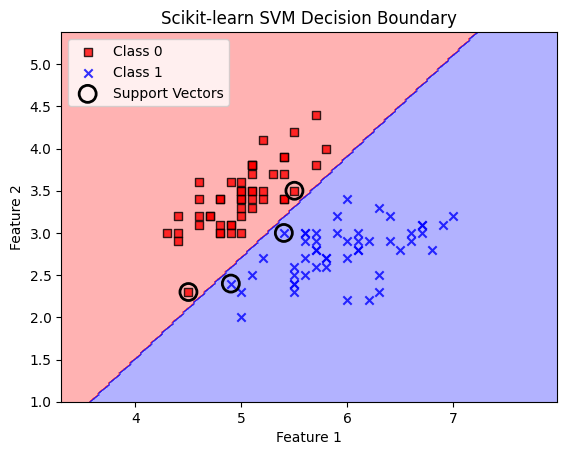

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC


class ScratchSVMClassifier():
    def __init__(self, num_iter=1000, lr=0.001, kernel='linear', threshold=1e-5, verbose=False):
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        self.lam = None
        self.b = 0.0

    def fit(self, X, y, X_val=None, y_val=None):
        y_mod = np.where(y == 0, -1, 1).astype(np.float64)
        n_samples = X.shape[0]
        self.lam = np.zeros(n_samples)

        for i in range(self.iter):
            for j in range(n_samples):
                grad = 1 - y_mod[j] * np.dot(X, X[j].T).T.dot(self.lam * y_mod)
                self.lam[j] += self.lr * grad
                self.lam[j] = max(0, self.lam[j])

            if self.verbose and i % 100 == 0:
                y_pred = self.predict(X, suppress_error=True)
                acc = accuracy_score(y, y_pred)
                print(f"Iteration {i}: Training Accuracy = {acc:.4f}")

        self.index_support_vectors = np.where(self.lam > self.threshold)[0]

        if len(self.index_support_vectors) == 0:
            print("No support vectors found. Try increasing the learning rate or number of iterations.")
            self.X_sv = np.array([])
            self.lam_sv = np.array([])
            self.y_sv = np.array([])
            self.b = 0
            return

        self.X_sv = X[self.index_support_vectors]
        self.lam_sv = self.lam[self.index_support_vectors]
        self.y_sv = y_mod[self.index_support_vectors]

        # Calculate bias using one support vector
        k = self.index_support_vectors[0]
        self.b = y_mod[k] - np.sum(self.lam_sv * self.y_sv * np.dot(self.X_sv, X[k]))

        if self.verbose:
            print(f"Training complete. Support vectors found: {len(self.index_support_vectors)}")

    def predict(self, X, suppress_error=False):
        if not hasattr(self, 'lam_sv') or self.X_sv.size == 0:
            if suppress_error:
                return np.zeros(X.shape[0])
            raise RuntimeError("Model is not trained or no support vectors were found.")

        y_pred = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            score = np.sum(self.lam_sv * self.y_sv * np.dot(self.X_sv, X[i])) + self.b
            y_pred[i] = np.sign(score)
        return np.where(y_pred == -1, 0, 1)


# Helper function to plot decision boundaries
def plot_decision_regions(X, y, classifier, title, support_vectors=None):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=f'Class {cl}',
                    edgecolor='black')

    if support_vectors is not None and len(support_vectors) > 0:
        plt.scatter(x=support_vectors[:, 0], y=support_vectors[:, 1],
                    s=150, facecolors='none', edgecolors='black',
                    marker='o', label='Support Vectors', linewidth=2)

    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(loc='upper left')
    plt.show()


# Main Execution
if __name__ == '__main__':
    iris = load_iris()
    X = iris.data
    y = iris.target

    # Use only 2 classes and first 2 features for binary classification and 2D plotting
    X_binary = X[y != 2][:, :2]
    y_binary = y[y != 2]

    X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

    # Scratch SVM
    print("Training Scratch SVM...")
    scratch_svm = ScratchSVMClassifier(num_iter=1000, lr=0.01, verbose=True)
    scratch_svm.fit(X_train, y_train)
    y_pred_scratch = scratch_svm.predict(X_test)

    y_test_mod = np.where(y_test == 0, -1, 1)
    y_pred_mod = np.where(y_pred_scratch == 0, -1, 1)

    print(f"\nScratch SVM Accuracy: {accuracy_score(y_test_mod, y_pred_mod):.4f}")
    print(f"Precision: {precision_score(y_test_mod, y_pred_mod):.4f}")
    print(f"Recall: {recall_score(y_test_mod, y_pred_mod):.4f}")

    # Plot decision boundary for Scratch SVM
    plot_decision_regions(np.vstack((X_train, X_test)),
                          np.hstack((y_train, y_test)),
                          classifier=scratch_svm,
                          title="Scratch SVM Decision Boundary",
                          support_vectors=scratch_svm.X_sv)

    # scikit-learn SVM
    print("\nTraining scikit-learn SVM...")
    sk_svm = SVC(kernel='linear', C=1e6)
    sk_svm.fit(X_train, y_train)
    y_pred_sk = sk_svm.predict(X_test)

    print(f"\nScikit-learn SVM Accuracy: {accuracy_score(y_test, y_pred_sk):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred_sk):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred_sk):.4f}")

    # Plot decision boundary for scikit-learn SVM
    plot_decision_regions(np.vstack((X_train, X_test)),
                          np.hstack((y_train, y_test)),
                          classifier=sk_svm,
                          title="Scikit-learn SVM Decision Boundary",
                          support_vectors=sk_svm.support_vectors_)

**6. Creation of polynomial kernel function**

Scratch SVM (Linear Kernel)
Iteration 0: Training accuracy = 0.5250
Iteration 100: Training accuracy = 0.5250
Iteration 200: Training accuracy = 0.5250
Iteration 300: Training accuracy = 0.5250
Iteration 400: Training accuracy = 0.5250
Iteration 500: Training accuracy = 0.5250
Iteration 600: Training accuracy = 0.5250
Iteration 700: Training accuracy = 0.5250
Iteration 800: Training accuracy = 0.5250
Iteration 900: Training accuracy = 0.5250
Training complete. Number of support vectors: 38
Test Accuracy: 0.5500

Scratch SVM (Polynomial Kernel)
Iteration 0: Training accuracy = 0.5250
Iteration 100: Training accuracy = 0.4750
Iteration 200: Training accuracy = 0.4750
Iteration 300: Training accuracy = 0.4750
Iteration 400: Training accuracy = 0.4750
Iteration 500: Training accuracy = 0.4750
Iteration 600: Training accuracy = 0.4750
Iteration 700: Training accuracy = 0.4750
Iteration 800: Training accuracy = 0.4750
Iteration 900: Training accuracy = 0.4750
Training complete. Number of sup

/tmp/ipython-input-1666549848.py:55: RuntimeWarning: overflow encountered in multiply
  grad = 1 - y_mod * np.sum(self.lam * y_mod * K, axis=1)
/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipython-input-1666549848.py:56: RuntimeWarning: invalid value encountered in add
  self.lam += self.lr * grad
/tmp/ipython-input-1666549848.py:122: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


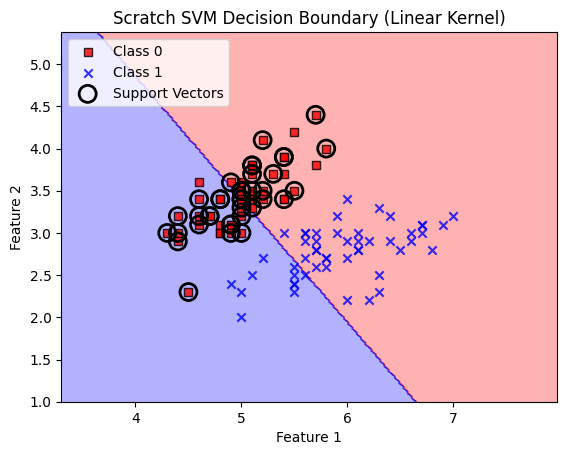

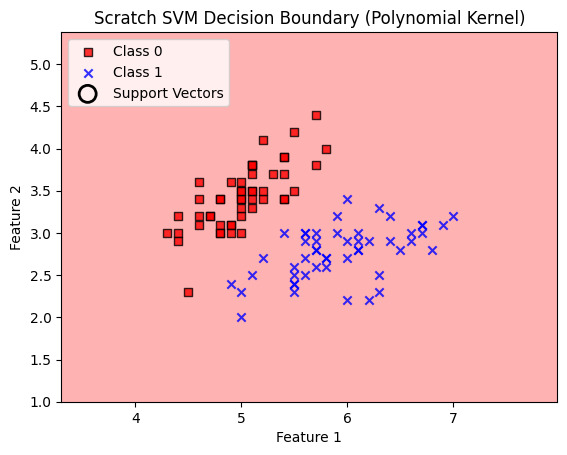

/tmp/ipython-input-1666549848.py:122: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


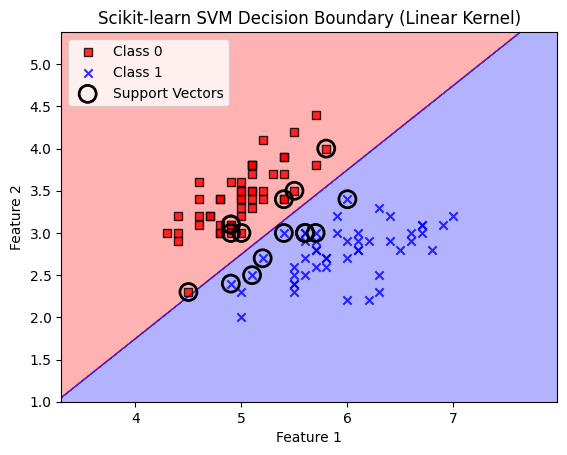

/tmp/ipython-input-1666549848.py:122: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


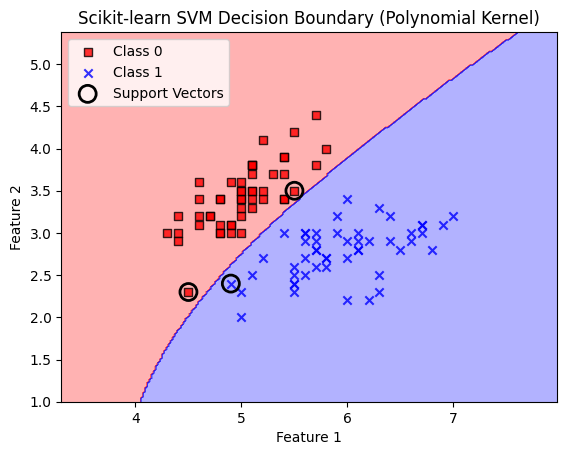

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC

class ScratchSVMClassifier:
    def __init__(self, num_iter=1000, lr=0.001, kernel='linear', threshold=1e-5,
                 verbose=False, gamma=1.0, coef0=0.0, degree=3):
        self.num_iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose

        # Polynomial kernel params
        self.gamma = gamma
        self.coef0 = coef0
        self.degree = degree

        # Model parameters (initialized after training)
        self.lam = None          # Lagrange multipliers (alphas)
        self.b = 0.0             # Bias term
        self.X_sv = None         # Support vectors
        self.y_sv = None         # Support vector labels
        self.lam_sv = None       # Nonzero lagrange multipliers (support vectors)
        self.support_vector_indices = None

    def _linear_kernel(self, X1, X2):
        return np.dot(X1, X2.T)

    def _polynomial_kernel(self, X1, X2):
        return (self.gamma * np.dot(X1, X2.T) + self.coef0) ** self.degree

    def fit(self, X, y):
        # Convert labels from {0,1} to {-1,1}
        y_mod = np.where(y == 0, -1, 1).astype(np.float64)
        n_samples = X.shape[0]

        # Initialize Lagrange multipliers
        self.lam = np.zeros(n_samples)

        # Compute kernel matrix once for all samples
        if self.kernel == 'linear':
            K = self._linear_kernel(X, X)
        elif self.kernel == 'poly':
            K = self._polynomial_kernel(X, X)
        else:
            raise ValueError("Unsupported kernel. Use 'linear' or 'poly'.")

        for i in range(self.num_iter):
            # Gradient vector for all lagrange multipliers
            grad = 1 - y_mod * np.sum(self.lam * y_mod * K, axis=1)
            self.lam += self.lr * grad
            # Enforce constraint: lagrange multipliers must be >= 0 (hard margin)
            self.lam = np.maximum(0, self.lam)

            if self.verbose and i % 100 == 0:
                decision_values = np.sum(self.lam * y_mod * K, axis=1)
                preds = np.where(decision_values >= 0, 1, -1)
                acc = accuracy_score(y_mod, preds)
                print(f"Iteration {i}: Training accuracy = {acc:.4f}")

        # Identify support vectors
        self.support_vector_indices = np.where(self.lam > self.threshold)[0]
        self.X_sv = X[self.support_vector_indices]
        self.y_sv = y_mod[self.support_vector_indices]
        self.lam_sv = self.lam[self.support_vector_indices]

        # Calculate bias term using any support vector (typically first)
        if len(self.support_vector_indices) > 0:
            sv_idx = self.support_vector_indices[0]
            sv_x = X[sv_idx].reshape(1, -1)
            sv_y = y_mod[sv_idx]

            if self.kernel == 'linear':
                kernel_result = self._linear_kernel(self.X_sv, sv_x).flatten()
            else:
                kernel_result = self._polynomial_kernel(self.X_sv, sv_x).flatten()

            self.b = sv_y - np.sum(self.lam_sv * self.y_sv * kernel_result)
        else:
            self.b = 0.0

        if self.verbose:
            print(f"Training complete. Number of support vectors: {len(self.support_vector_indices)}")

    def predict(self, X):
        if self.lam_sv is None or self.X_sv is None or self.y_sv is None:
            raise RuntimeError("Model not trained yet.")

        if self.kernel == 'linear':
            K = self._linear_kernel(self.X_sv, X)
        else:
            K = self._polynomial_kernel(self.X_sv, X)

        decision_values = np.dot(self.lam_sv * self.y_sv, K) + self.b
        y_pred = np.sign(decision_values)
        return np.where(y_pred == -1, 0, 1)


def plot_decision_regions(X, y, classifier, title, support_vectors=None):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))
    grid_points = np.array([xx1.ravel(), xx2.ravel()]).T
    Z = classifier.predict(grid_points)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

    if support_vectors is not None:
        plt.scatter(support_vectors[:, 0],
                    support_vectors[:, 1],
                    s=150,
                    facecolors='none',
                    edgecolors='black',
                    marker='o',
                    label='Support Vectors',
                    linewidth=2)

    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(loc='upper left')
    plt.show()


if __name__ == "__main__":
    # Load Iris dataset and prepare binary classification problem
    iris = load_iris()
    X = iris.data[:, :2]  # only first two features for visualization
    y = iris.target
    mask = y != 2  # Filter only two classes: 0 and 1
    X, y = X[mask], y[mask]

    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.2,
                                                        random_state=42)

    # Scratch SVM (Linear Kernel)
    print("Scratch SVM (Linear Kernel)")
    svm_linear = ScratchSVMClassifier(num_iter=1000, lr=0.001, kernel='linear', verbose=True)
    svm_linear.fit(X_train, y_train)
    y_pred_linear = svm_linear.predict(X_test)
    print(f"Test Accuracy: {accuracy_score(y_test, y_pred_linear):.4f}")

    # Scratch SVM (Polynomial Kernel)
    print("\nScratch SVM (Polynomial Kernel)")
    svm_poly = ScratchSVMClassifier(num_iter=1000, lr=0.001, kernel='poly', verbose=True,
                                    gamma=1.0, coef0=1.0, degree=3)
    svm_poly.fit(X_train, y_train)
    y_pred_poly = svm_poly.predict(X_test)
    print(f"Test Accuracy: {accuracy_score(y_test, y_pred_poly):.4f}")

    # Scikit-learn SVM for comparison
    print("\nScikit-learn SVM (Linear Kernel)")
    sk_svm_linear = SVC(kernel='linear')
    sk_svm_linear.fit(X_train, y_train)
    y_pred_sk_linear = sk_svm_linear.predict(X_test)
    print(f"Test Accuracy: {accuracy_score(y_test, y_pred_sk_linear):.4f}")

    print("\nScikit-learn SVM (Polynomial Kernel)")
    sk_svm_poly = SVC(kernel='poly', degree=3, gamma=1, coef0=1)
    sk_svm_poly.fit(X_train, y_train)
    y_pred_sk_poly = sk_svm_poly.predict(X_test)
    print(f"Test Accuracy: {accuracy_score(y_test, y_pred_sk_poly):.4f}")

    # Plot decision regions
    X_combined = np.vstack((X_train, X_test))
    y_combined = np.hstack((y_train, y_test))

    plot_decision_regions(X_combined, y_combined,
                          classifier=svm_linear,
                          title="Scratch SVM Decision Boundary (Linear Kernel)",
                          support_vectors=svm_linear.X_sv)

    plot_decision_regions(X_combined, y_combined,
                          classifier=svm_poly,
                          title="Scratch SVM Decision Boundary (Polynomial Kernel)",
                          support_vectors=svm_poly.X_sv)

    plot_decision_regions(X_combined, y_combined,
                          classifier=sk_svm_linear,
                          title="Scikit-learn SVM Decision Boundary (Linear Kernel)",
                          support_vectors=sk_svm_linear.support_vectors_)

    plot_decision_regions(X_combined, y_combined,
                          classifier=sk_svm_poly,
                          title="Scikit-learn SVM Decision Boundary (Polynomial Kernel)",
                          support_vectors=sk_svm_poly.support_vectors_)
